# **Binary Classification with a Bank Dataset**

#Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

# Data Loading & Exploring & Cleaning

In [7]:
# Separator is important to be changed because of the data specification
data = pd.read_csv('/content/drive/MyDrive/Datas/bank-full.csv', sep=';')

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [13]:
data.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [14]:
data.duplicated().sum()

np.int64(0)

# Preparing Data For Machine Learning

In [17]:
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False


In [19]:
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']

print(X.shape)
print(y.shape)

(45211, 42)
(45211,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
model = Sequential()
model.add(Dense(units=40, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=28, batch_size=32, validation_split=0.2)

Epoch 1/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8262 - loss: 0.4067 - val_accuracy: 0.8912 - val_loss: 0.2229
Epoch 2/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8933 - loss: 0.2500 - val_accuracy: 0.9027 - val_loss: 0.2149
Epoch 3/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8956 - loss: 0.2350 - val_accuracy: 0.9020 - val_loss: 0.2120
Epoch 4/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8992 - loss: 0.2318 - val_accuracy: 0.9002 - val_loss: 0.2114
Epoch 5/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8973 - loss: 0.2304 - val_accuracy: 0.8987 - val_loss: 0.2102
Epoch 6/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9028 - loss: 0.2147 - val_accuracy: 0.8984 - val_loss: 0.2088
Epoch 7/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9000 - loss: 0.2178 - val_accuracy: 0.9030 - val_loss: 0.2080
Epoch 8/28
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9024 - loss: 0.2136 - val_accuracy: 0.

In [70]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9023 - loss: 0.2224
Test Accuracy: 90.47%


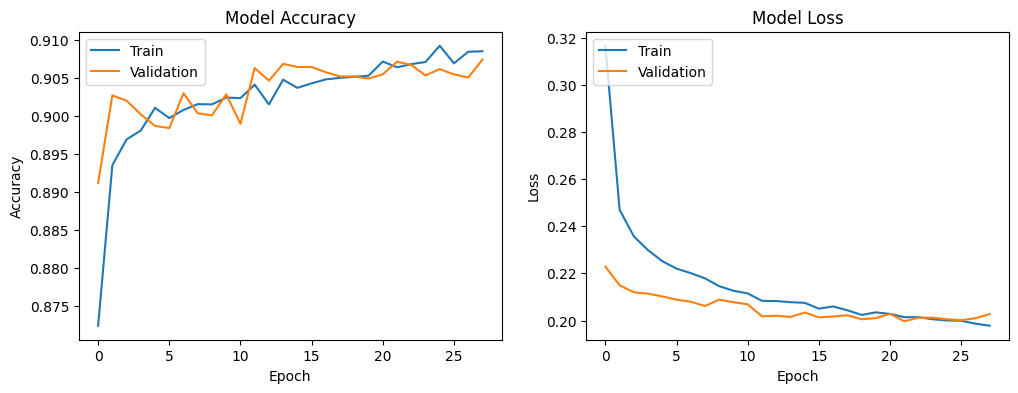

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[7649  303]
 [ 559  532]]

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.95      7952
        True       0.64      0.49      0.55      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.72      0.75      9043
weighted avg       0.90      0.90      0.90      9043

